# Modelo *Fuzzy* TSK
Por Gabriel Negreiros Lima

A função desejada é `x²`, plotada abaixo.

[-4.         -3.91919192 -3.83838384 -3.75757576 -3.67676768 -3.5959596
 -3.51515152 -3.43434343 -3.35353535 -3.27272727 -3.19191919 -3.11111111
 -3.03030303 -2.94949495 -2.86868687 -2.78787879 -2.70707071 -2.62626263
 -2.54545455 -2.46464646 -2.38383838 -2.3030303  -2.22222222 -2.14141414
 -2.06060606 -1.97979798 -1.8989899  -1.81818182 -1.73737374 -1.65656566
 -1.57575758 -1.49494949 -1.41414141 -1.33333333 -1.25252525 -1.17171717
 -1.09090909 -1.01010101 -0.92929293 -0.84848485 -0.76767677 -0.68686869
 -0.60606061 -0.52525253 -0.44444444 -0.36363636 -0.28282828 -0.2020202
 -0.12121212 -0.04040404  0.04040404  0.12121212  0.2020202   0.28282828
  0.36363636  0.44444444  0.52525253  0.60606061  0.68686869  0.76767677
  0.84848485  0.92929293  1.01010101  1.09090909  1.17171717  1.25252525
  1.33333333  1.41414141  1.49494949  1.57575758  1.65656566  1.73737374
  1.81818182  1.8989899   1.97979798  2.06060606  2.14141414  2.22222222
  2.3030303   2.38383838  2.46464646  2.54545455  2.6

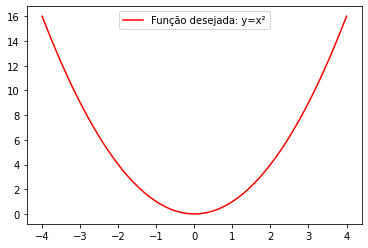

numpy.ndarray

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# 100 pontos igualmente espaçados entre -4 e 4
x = np.linspace(-4, 4, num=100)
print(x)

# saída desejada
y_d = x**2

plt.plot(x,y_d, 'r', label='Função desejada: y=x²')
plt.legend()
plt.show()
type(x)

Primeiramente precisamos iniciar com valores aleatórios todos os parâmetros:

In [2]:
import random

def random_point():
    return random.random()*4 - 2 # returns between -2.0 and 2.0

Definimos as funções dos slides para calcular os parâmetros: 

In [3]:
import math

# Dos slides
def y(p, x, q):
    return p*x + q

def line_function_1(x, mean, std_dev):
    #print(x, mean, std_dev)
    return math.exp((-1/2) * (((x - mean)/std_dev)**2))
def line_function_2(x, mean, std_dev):
    return math.exp((-1/2) * (((x - mean)/std_dev)**2))

def update_p_1(p_1, alpha, error, x, w_1, w_2):
    return p_1 - alpha*error*x*(w_1/(w_1+w_2))
def update_p_2(p_2, alpha, error, x, w_1, w_2):
    return p_2 - alpha*error*x*(w_2/(w_1+w_2))

def update_q_1(q_1, alpha, error,w_1, w_2):
    return q_1 - alpha*error*(w_1/(w_1+w_2))
def update_q_2(q_2, alpha, error, w_1, w_2):
    return q_2 - alpha*error*(w_2/(w_1+w_2))

def update_std_dev_1(q_1, alpha, error,w_1, w_2):
    return q_1 - alpha*error*(w_1/(w_1+w_2))

def update_q_2(q_2, alpha, error, w_1, w_2):
    return q_2 - alpha*error*(w_2/(w_1+w_2))

def calc_y(x_it, p_1, p_2, q_1, q_2, std_dev_1, std_dev_2, mean_1, mean_2):
    w_1 = line_function_1(x_it, mean_1, std_dev_1)
    w_2 = line_function_2(x_it, mean_2, std_dev_2)
    
    y_1 = y(p_1, x_it, q_1)
    y_2 = y(p_2, x_it, q_2)
    
    return (w_1*y_1 + w_2*y_2)/(w_1+w_2)


Definimos um vetor com 1000 pontos aleatórios: 

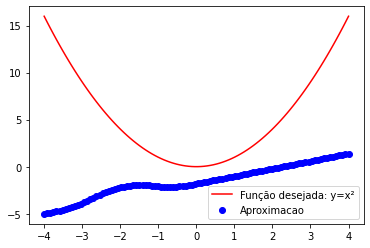

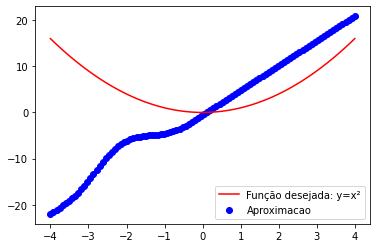

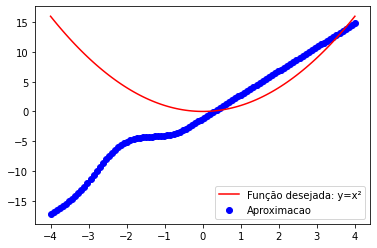

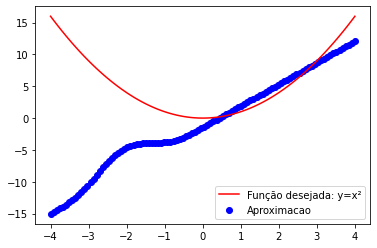

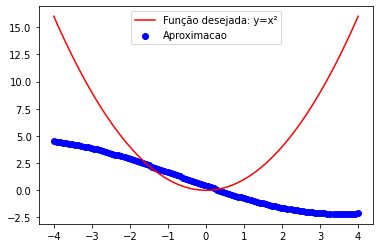

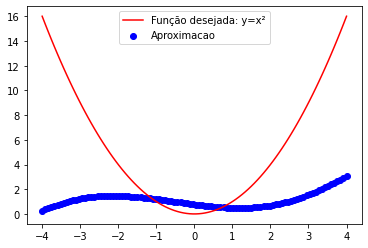

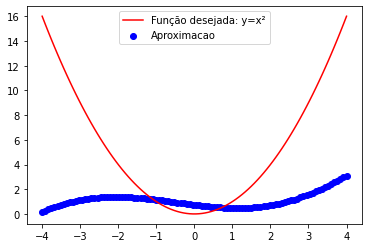

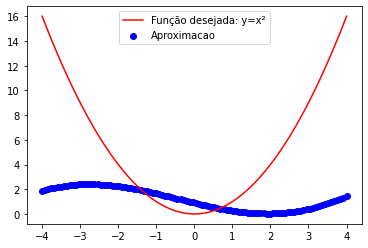

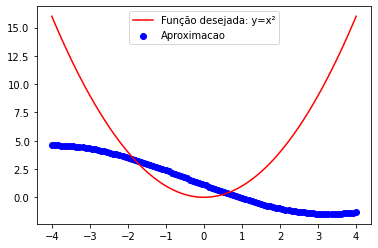

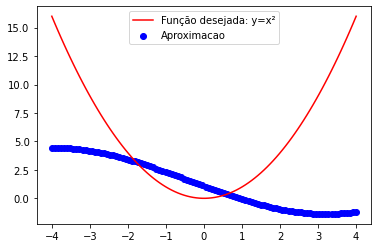

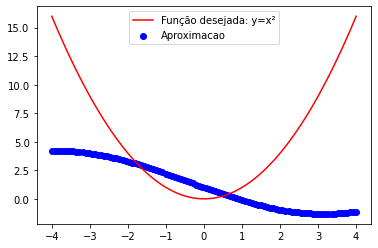

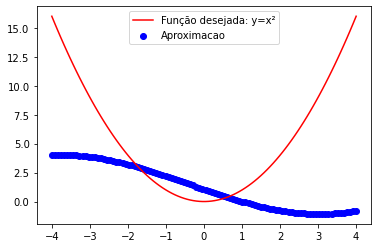

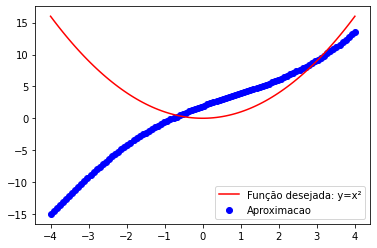

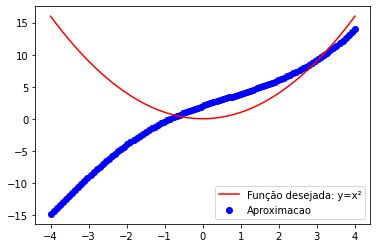

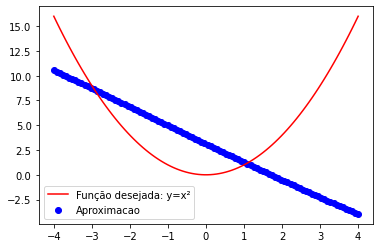

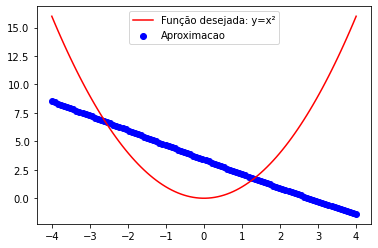

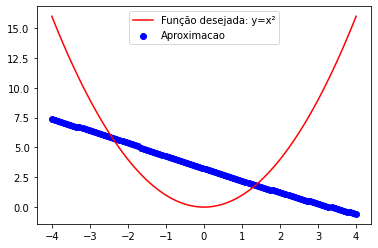

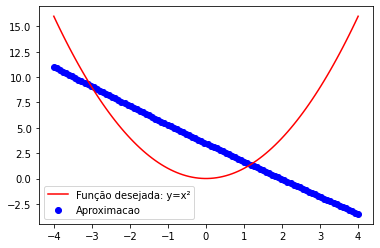

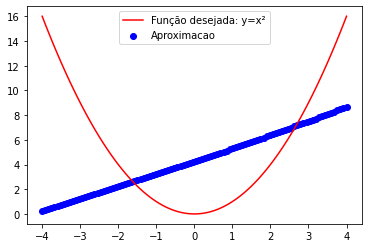

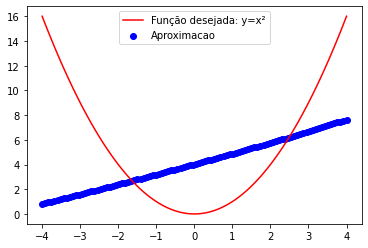

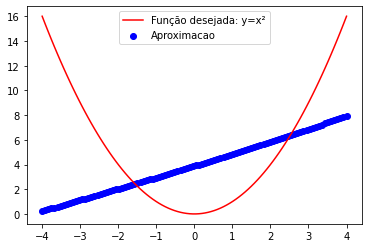

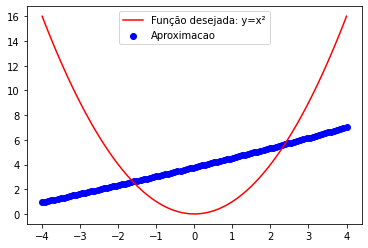

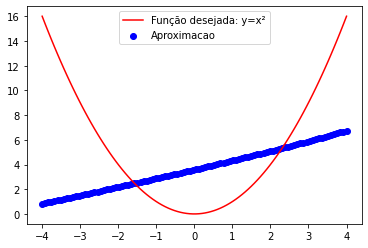

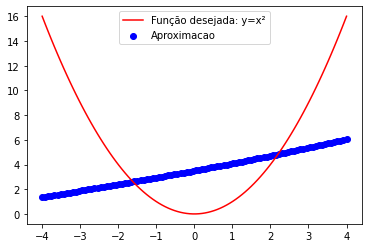

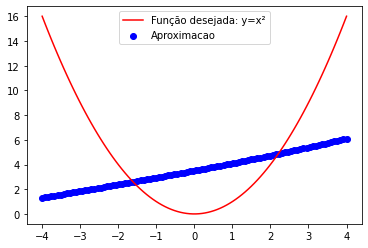

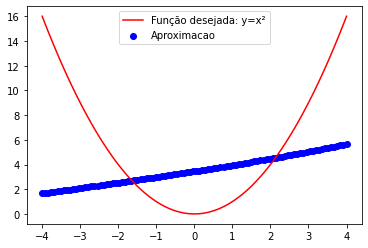

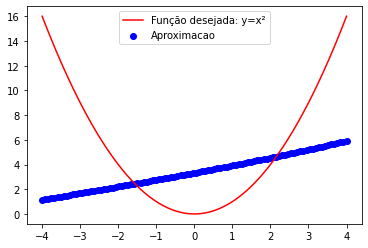

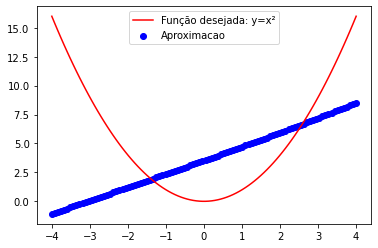

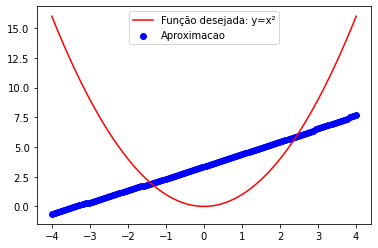

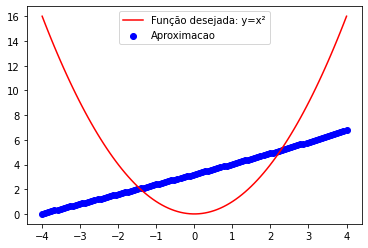

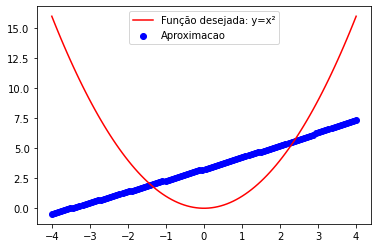

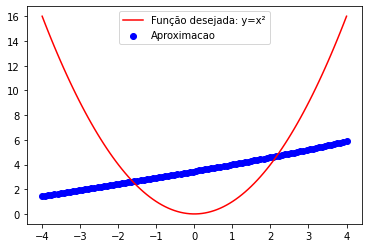

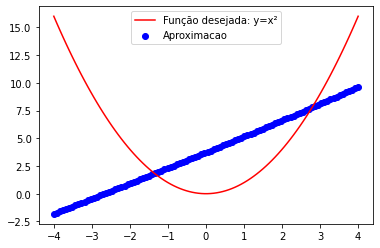

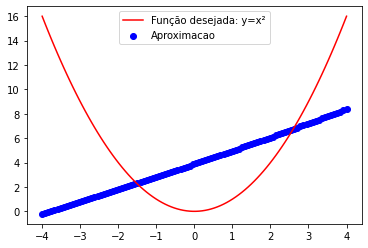

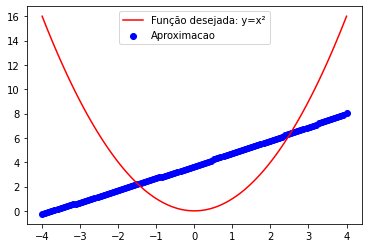

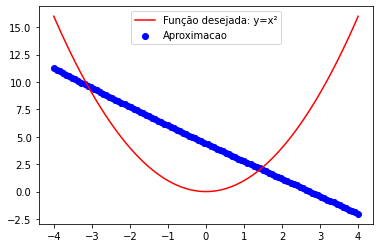

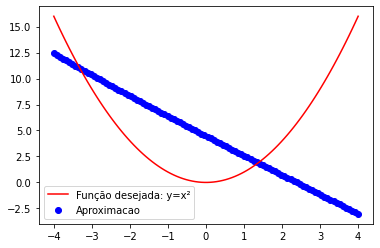

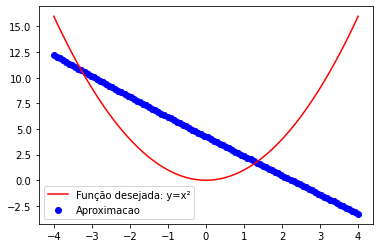

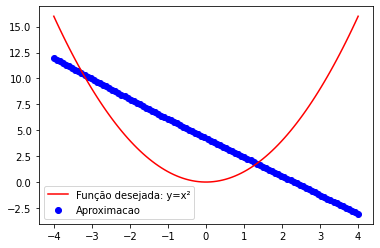

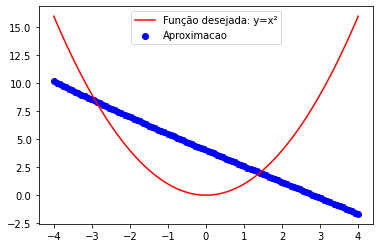

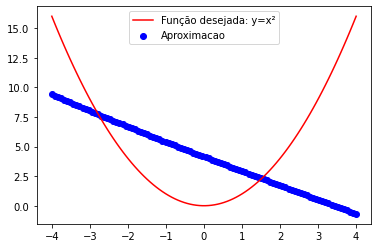

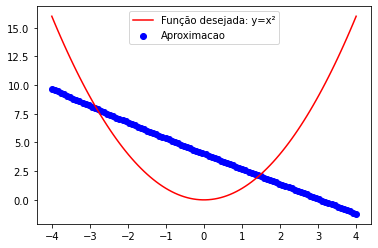

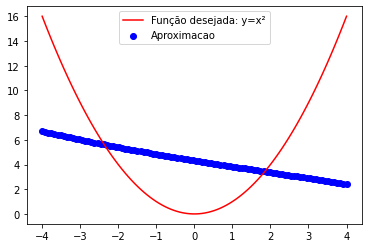

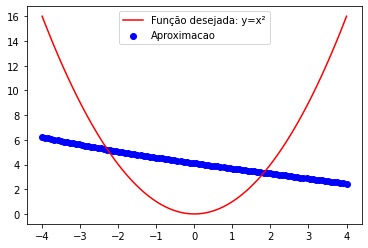

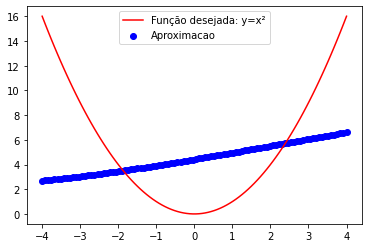

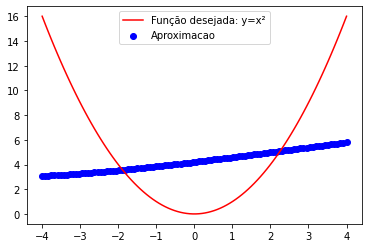

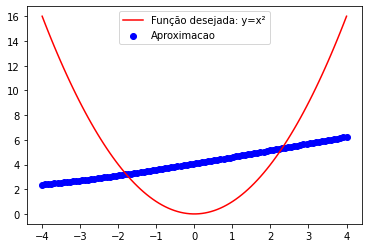

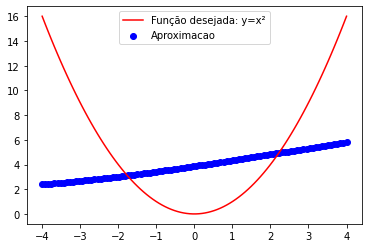

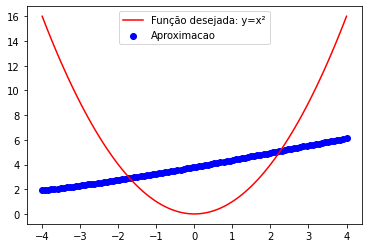

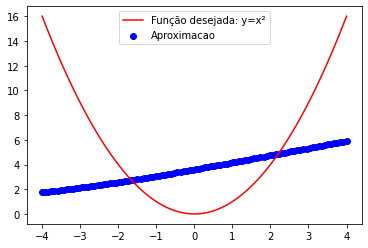

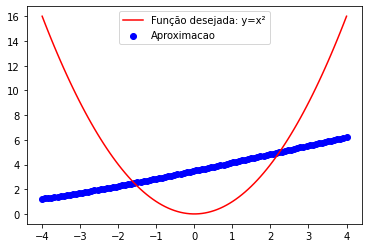

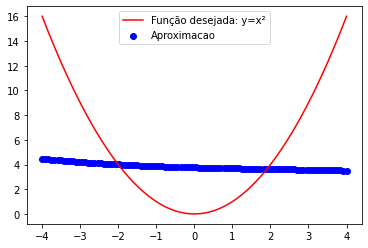

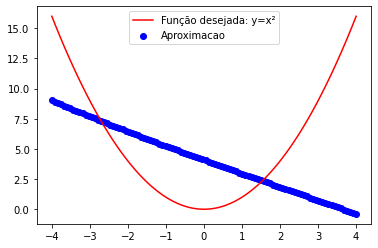

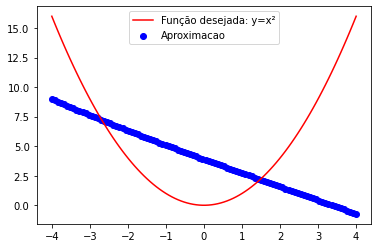

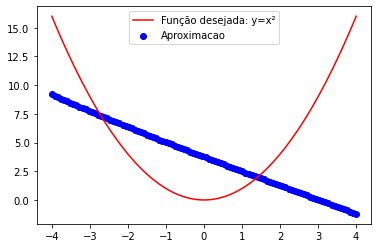

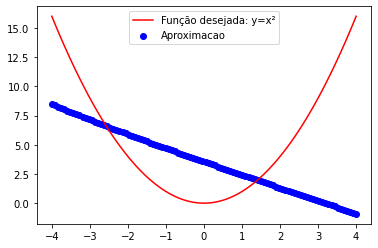

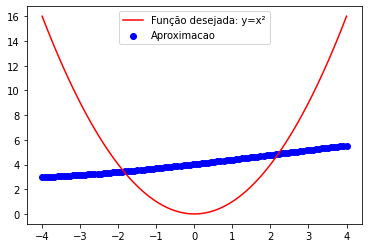

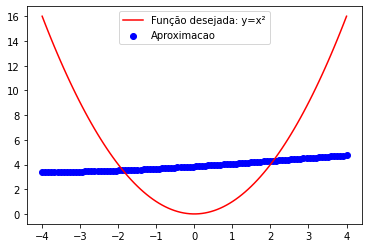

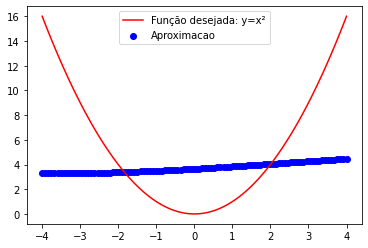

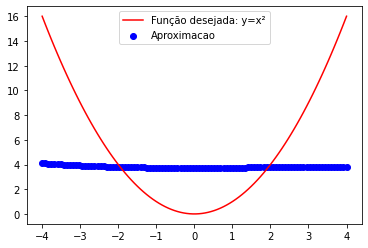

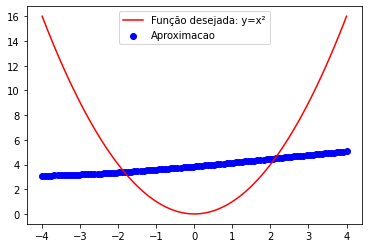

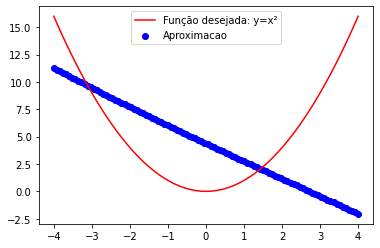

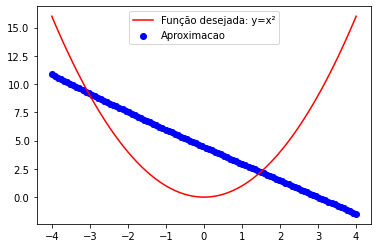

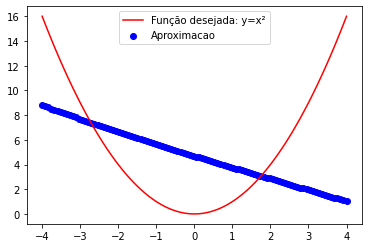

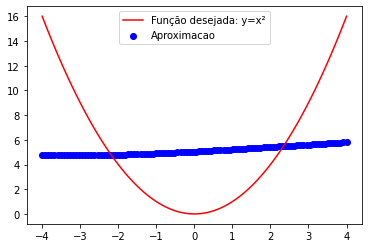

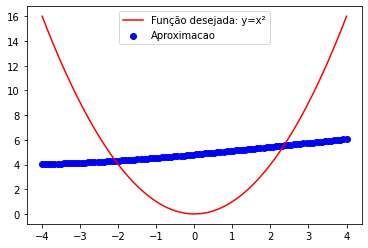

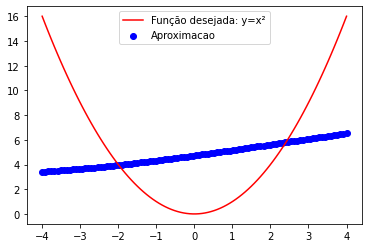

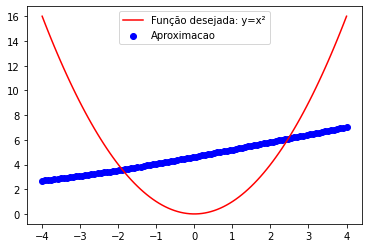

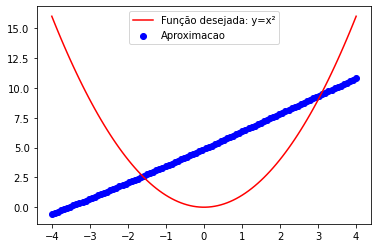

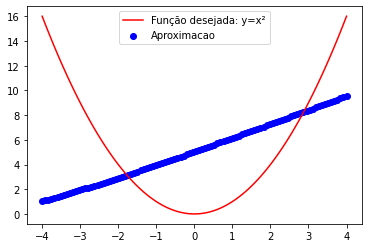

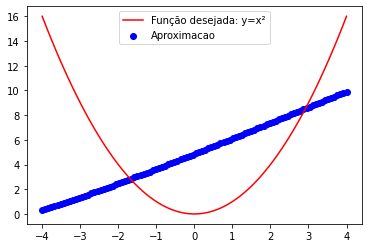

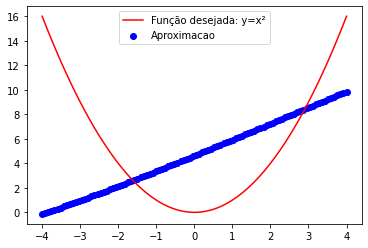

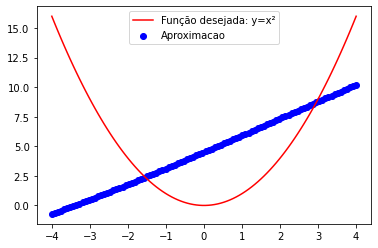

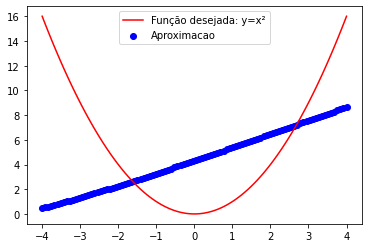

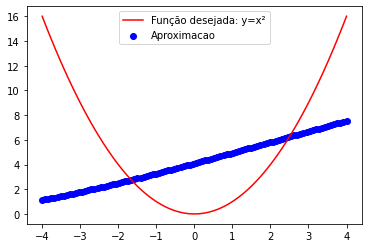

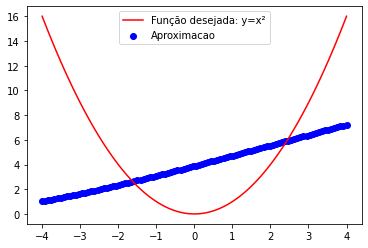

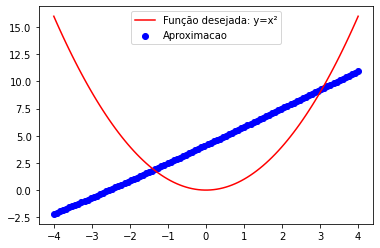

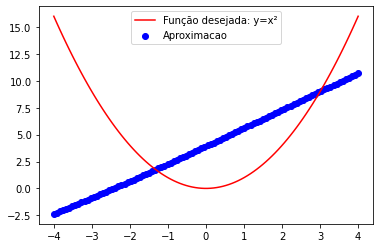

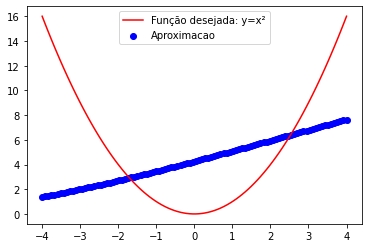

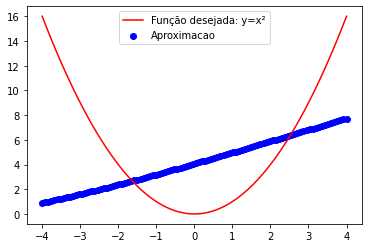

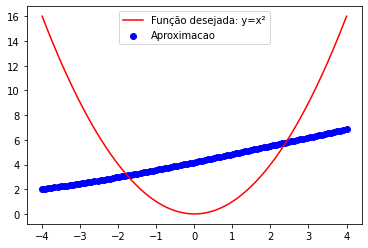

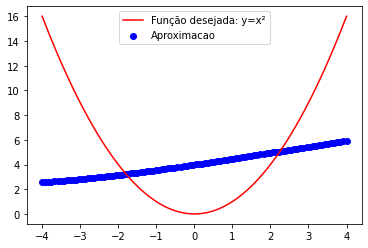

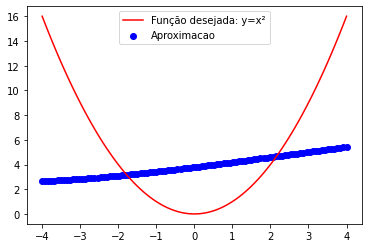

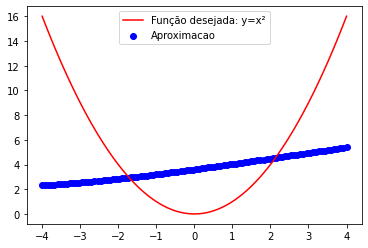

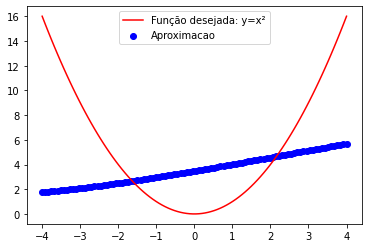

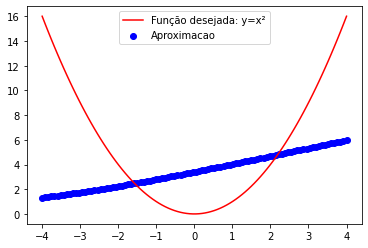

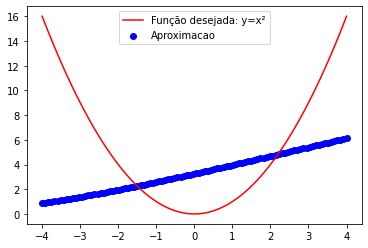

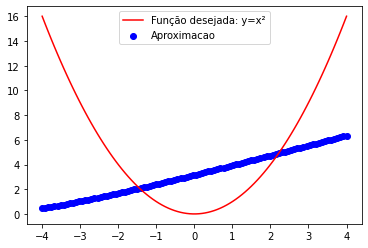

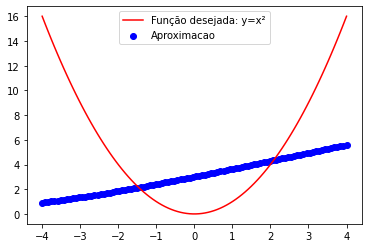

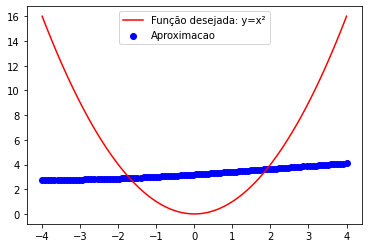

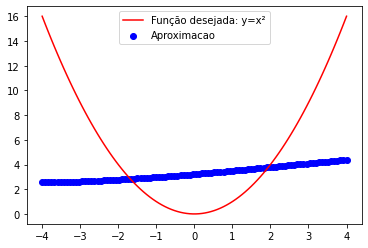

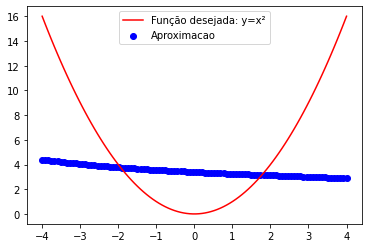

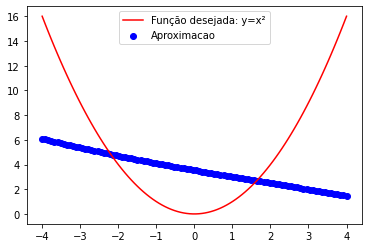

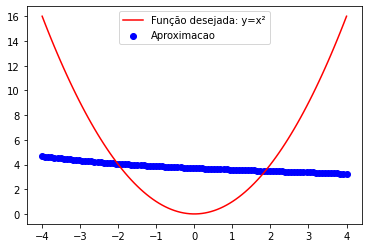

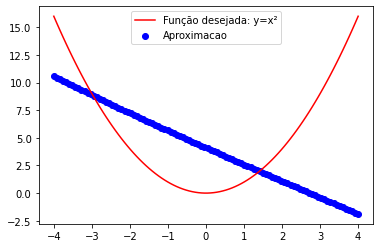

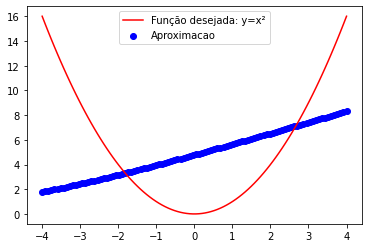

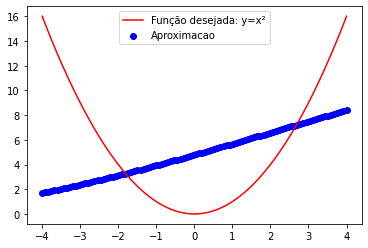

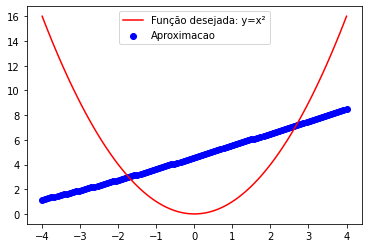

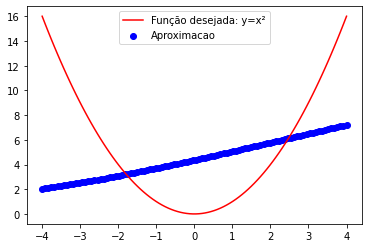

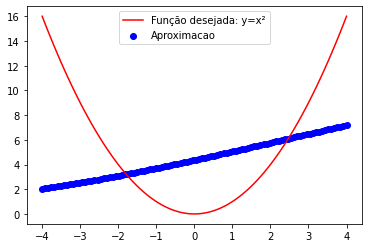

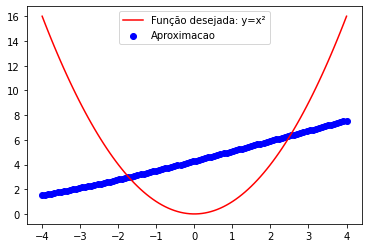

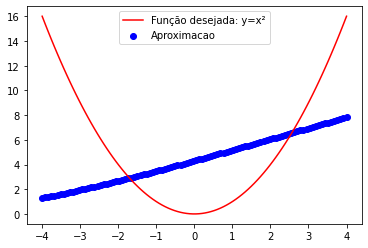

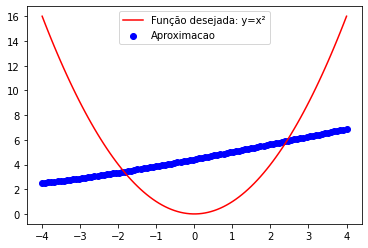

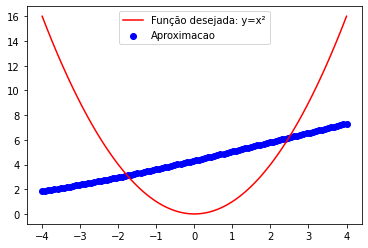

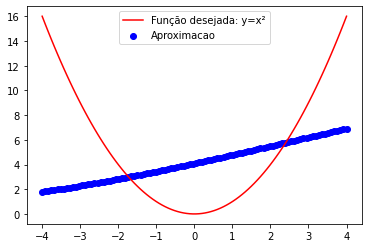

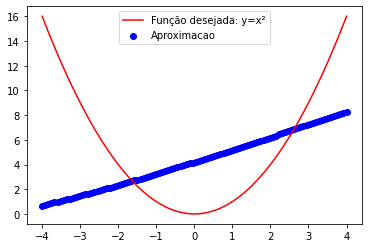

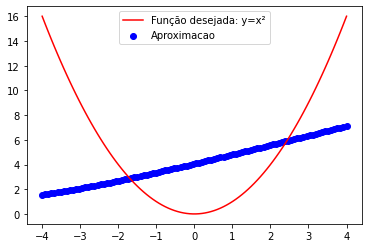

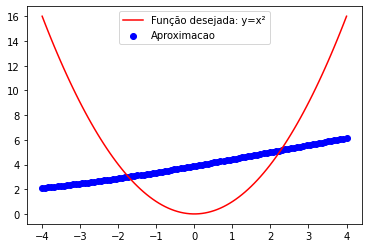

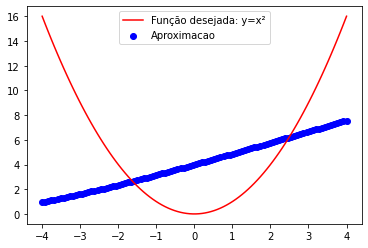

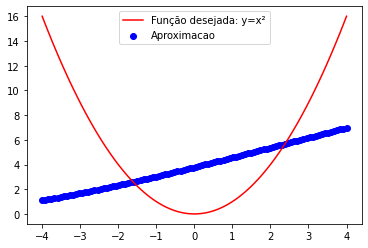

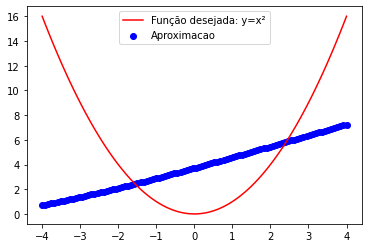

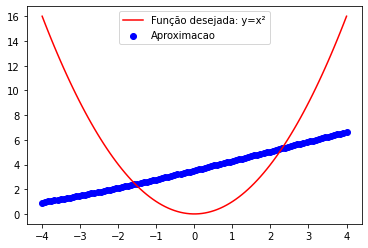

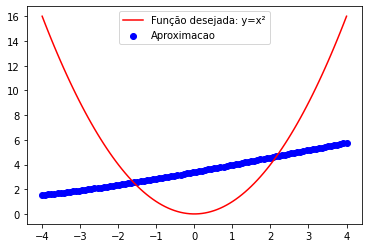

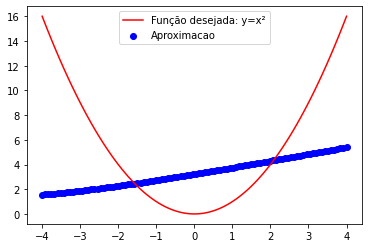

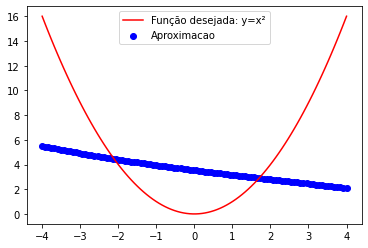

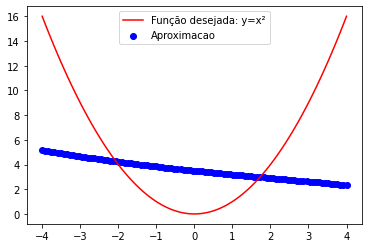

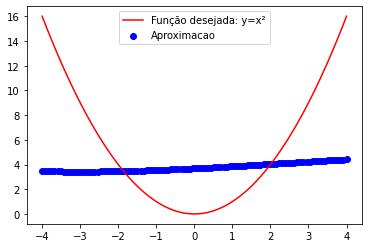

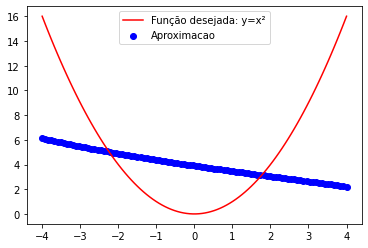

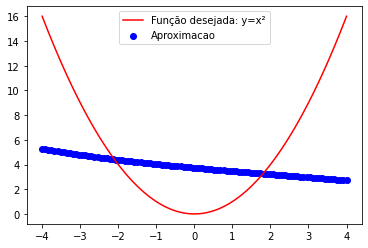

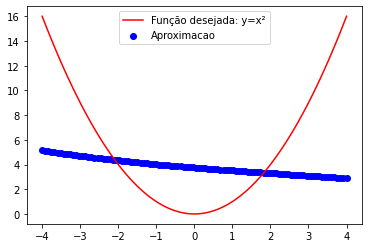

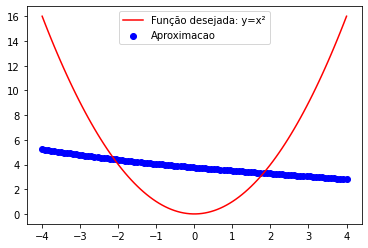

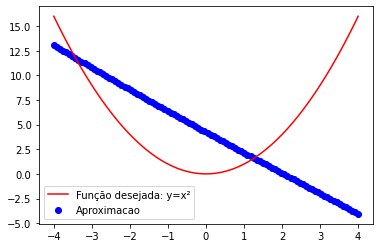

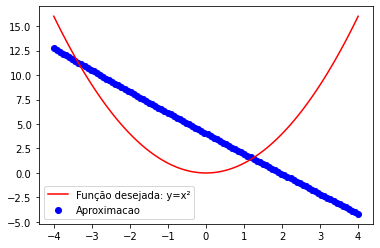

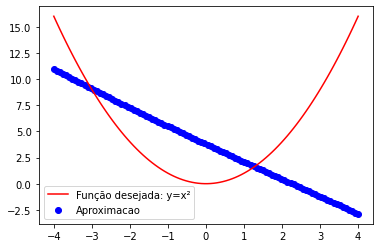

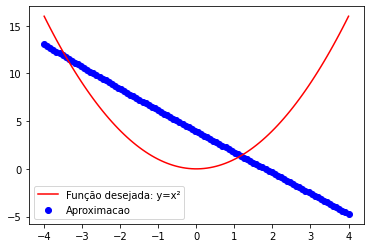

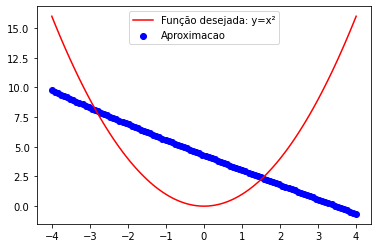

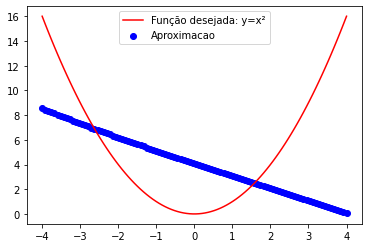

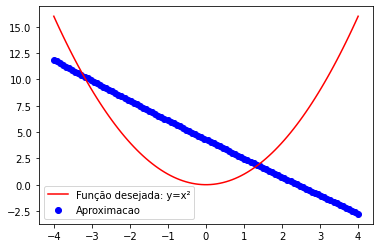

KeyboardInterrupt: 

In [5]:
error = 1
max_it = 10000000
it = 0

#p_1 = random_point()
#q_1 = random_point()
#p_2 = random_point()
#q_2 = random_point()
p_1, q_1 = random_point(), random_point()
p_2,q_2= random_point(), random_point()
std_dev_1 = random_point()
std_dev_2 = random_point()
mean_1 = random_point()
mean_2 =random_point()
#print(p_1, p_2, q_1, q_2)

alpha = 0.1

while (abs(error) > 0.001 or it==max_it):
    pos = random.randint(0, len(x)-1)
    x_it = x[pos]
    w_1 = line_function_1(x_it, mean_1, std_dev_1)
    w_2 = line_function_2(x_it, mean_2, std_dev_2)
    
    y_f = calc_y(x_it, p_1, p_2, q_1, q_2, std_dev_1, std_dev_2, mean_1, mean_2)
    
    error = y_f - x_it**2
    #print(f"error: {error}")
    y_vec = []
    for it in x:
        y_vec.append(calc_y(it, p_1, p_2, q_1, q_2, std_dev_1, std_dev_2, mean_1, mean_2))

    plt.scatter(x, y_vec,marker=r'o',color='b', label="Aproximacao")
    plt.plot(x,y_d, 'r', label='Função desejada: y=x²')
    plt.legend()
    plt.show()
    
    #print(f"p_1 before: {p_1}")
    p_1 = p_1 - alpha*error*x_it*(w_1/(w_1+w_2))
    #print(f"p_1 after: {p_1}")
    p_2 = p_2 - alpha*error*x_it*(w_2/(w_1+w_2))
    
    q_1 = q_1 - alpha*error*(w_1/(w_1+w_2))
    q_2 = q_2 - alpha*error*(w_2/(w_1+w_2))
    
    y_1 = y(p_1, x_it, q_1)
    y_2 = y(p_2, x_it, q_2)
  
    mean_1  = mean_1 - mean_1*alpha*error*w_2*(y_1 - y_2)/((w_1+w_2)**2)*w_1*(x_it - mean_1)/(std_dev_1**2)
    mean_2  = mean_2 - mean_2*alpha*error*w_1*(y_2 - y_1)/((w_1+w_2)**2)*w_2*(x_it - mean_2)/(std_dev_2**2)
    
    std_dev_1 = std_dev_1 - std_dev_1*alpha*error*w_2*(y_1 - y_2)/((w_1+w_2)**2)*w_1*((x_it - mean_1)**2)/(std_dev_1**3)
    std_dev_2 = std_dev_2 - std_dev_2*alpha*error*w_1*(y_1 - y_2)/((w_1+w_2)**2)*w_2*((x_it - mean_2)**2)/(std_dev_2**3)
    
    
    it += 1
